In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv('data.csv')
df.sample(5)

,feature1,feature2,feature3,target
54,1.002536,1.178222,-0.489006,80.149781
198,-0.914822,-0.897140,-0.784205,-93.235783
9,-0.348368,-1.811019,0.746892,29.469835
173,-0.237337,0.885340,1.315167,10.231646
16,-0.294033,-0.687860,0.786363,33.375597


In [3]:
x = df.drop(columns=['target'])
y = df['target']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [6]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([ -34.15940191,  192.46217091,   14.47214718,  -15.86607352,
        118.45019356, -107.61807806,  -39.87554019,   93.61716145,
         -6.69781756,   29.05027197,   15.36445572, -107.06605055,
         64.83251264,  144.5855839 ,  -20.32887181,  138.54904956,
        -49.91118788,  168.58846384,   62.00645938,  181.04579189,
         32.81750553,   22.00367952,   70.95306773,  -12.68597187,
         -0.76125276, -105.71902535,  180.02240637, -120.74853888,
        -31.27085523,  135.18511944,  107.61613383,  -10.26259395,
          7.443399  ,   53.45257229,   27.5983241 ,  -46.69706184,
         14.88897403,  102.96105229,  -50.23024259,   80.73993563,
        172.62759813,  -20.79012165, -123.73924617,  -64.11059324,
       -106.35918075,  -99.90796197,  -51.75264896,  108.40889567,
       -156.30946173,  161.7930937 ])

In [9]:
cross_val_score(LinearRegression(),x_train,y_train,cv=10).mean()

0.950327430192653

Linear Relationship

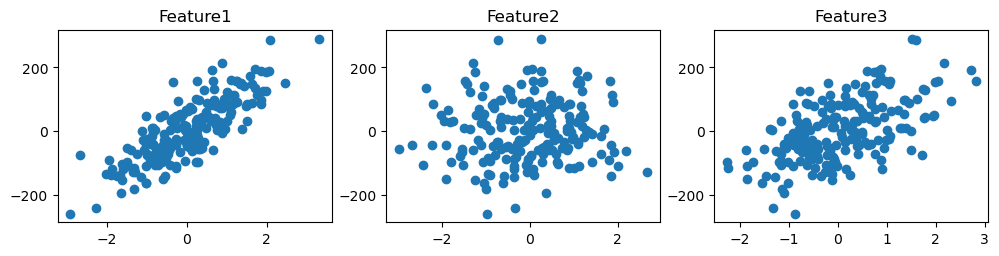

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

Multi-collinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train, i))

In [14]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.009656,1.013895,1.012928


<Axes: >

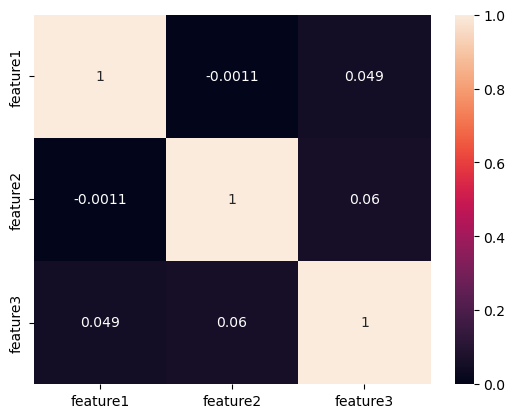

In [16]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

Normal Distribution

c:\Users\Khushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


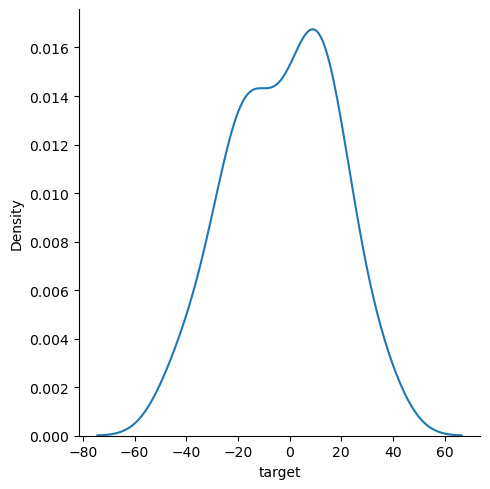

In [19]:
residual = y_test - y_pred
sns.displot(residual,kind='kde')

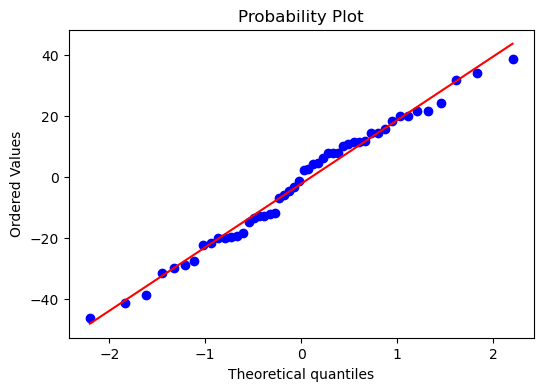

In [20]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()